In [19]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
conn = sqlite3.connect("Chinook_Sqlite.sqlite")

query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
print(tables)




             name
0           Album
1          Artist
2        Customer
3        Employee
4           Genre
5         Invoice
6     InvoiceLine
7       MediaType
8        Playlist
9   PlaylistTrack
10          Track


C:\Users\Uktambek\AppData\Local\Temp\ipykernel_11756\2922147848.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalSales", y="Employee", data=df, palette="viridis")


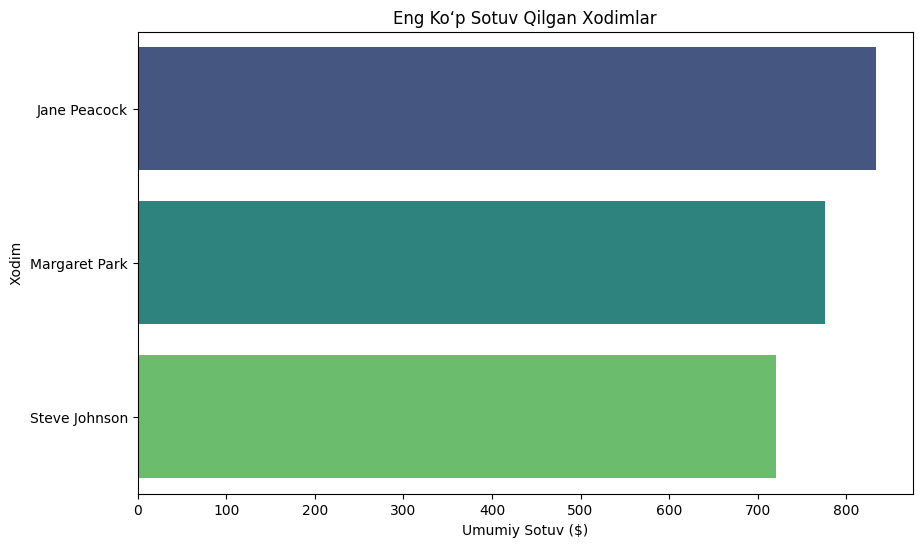

In [21]:


query = """
SELECT e.FirstName || ' ' || e.LastName AS Employee,
       SUM(i.Total) AS TotalSales
FROM Employee e
JOIN Customer c ON e.EmployeeId = c.SupportRepId
JOIN Invoice i ON c.CustomerId = i.CustomerId
GROUP BY e.EmployeeId
ORDER BY TotalSales DESC;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
sns.barplot(x="TotalSales", y="Employee", data=df, palette="viridis")
plt.title("Eng Ko‘p Sotuv Qilgan Xodimlar")
plt.xlabel("Umumiy Sotuv ($)")
plt.ylabel("Xodim")
plt.show()



C:\Users\Uktambek\AppData\Local\Temp\ipykernel_11756\151736412.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="SalesCount", y="TrackName", data=df, palette="magma")


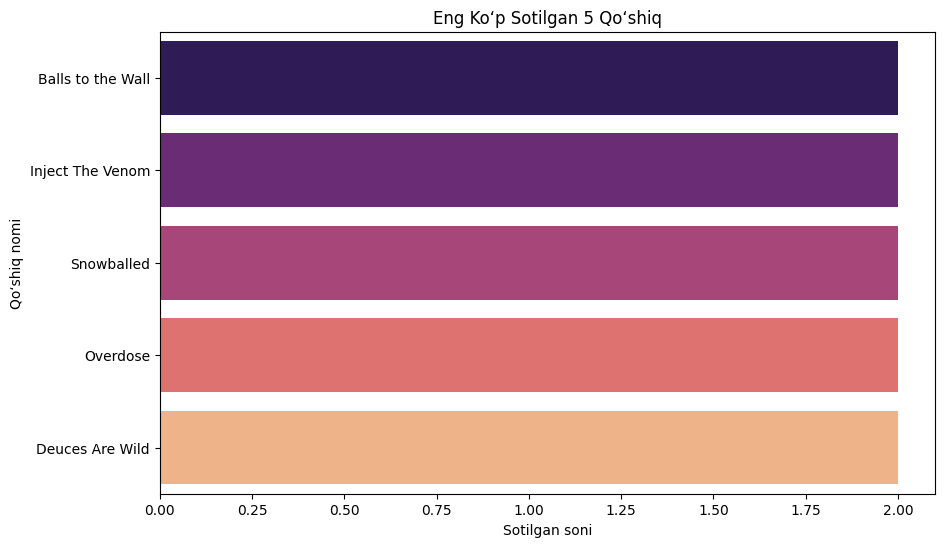

In [22]:


query = """
WITH TopTracks AS (
    SELECT t.Name AS TrackName,
           COUNT(ii.Quantity) AS SalesCount
    FROM InvoiceLine ii
    JOIN Track t ON ii.TrackId = t.TrackId
    GROUP BY t.TrackId
    ORDER BY SalesCount DESC
    LIMIT 5
)
SELECT * FROM TopTracks;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
sns.barplot(x="SalesCount", y="TrackName", data=df, palette="magma")
plt.title("Eng Ko‘p Sotilgan 5 Qo‘shiq")
plt.xlabel("Sotilgan soni")
plt.ylabel("Qo‘shiq nomi")
plt.show()




C:\Users\Uktambek\AppData\Local\Temp\ipykernel_11756\2694099154.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalSpent", y="Customer", data=df, palette="coolwarm")


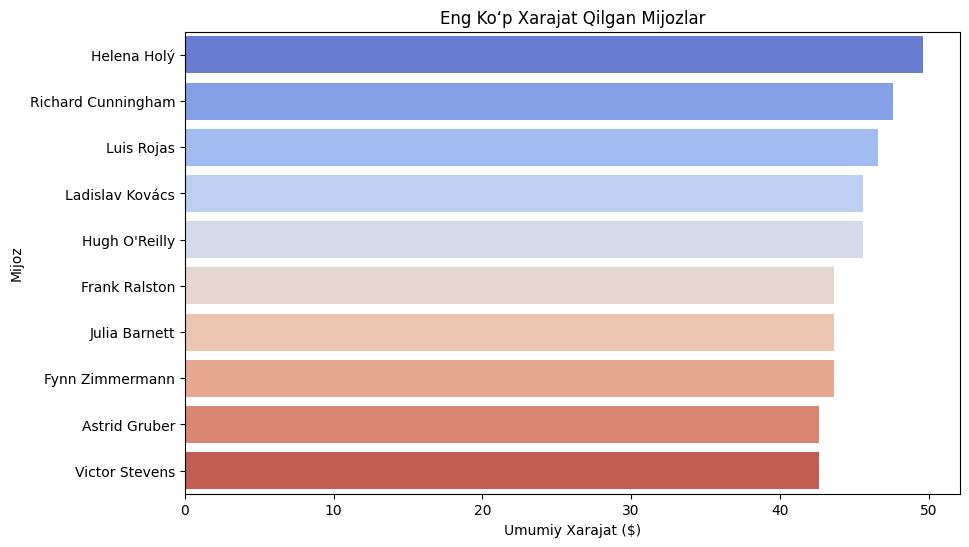

In [23]:
query = """
SELECT 
    c.FirstName || ' ' || c.LastName AS Customer,
    SUM(i.Total) AS TotalSpent
FROM Customer c
JOIN Invoice i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId
ORDER BY TotalSpent DESC
LIMIT 10;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
sns.barplot(x="TotalSpent", y="Customer", data=df, palette="coolwarm")
plt.title("Eng Ko‘p Xarajat Qilgan Mijozlar")
plt.xlabel("Umumiy Xarajat ($)")
plt.ylabel("Mijoz")
plt.show()


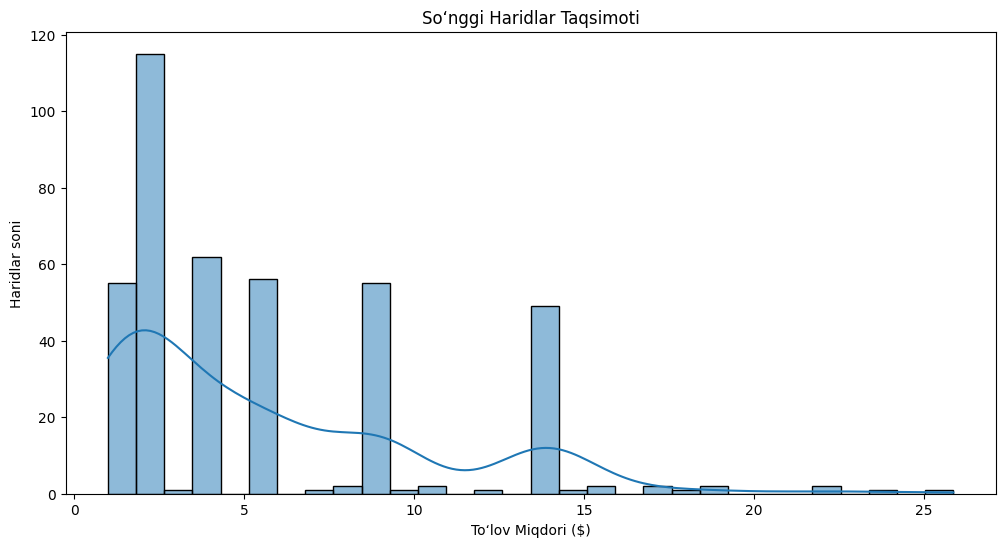

In [14]:
query = """
WITH LastPurchase AS (
    SELECT i.InvoiceDate, i.Total
    FROM Invoice i
    ORDER BY i.InvoiceDate DESC
)
SELECT * FROM LastPurchase;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
sns.histplot(df["Total"], bins=30, kde=True)
plt.title("So‘nggi Haridlar Taqsimoti")
plt.xlabel("To‘lov Miqdori ($)")
plt.ylabel("Haridlar soni")
plt.show()


C:\Users\Uktambek\AppData\Local\Temp\ipykernel_11756\3684770686.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalSold", y="Album", data=df, palette="plasma")


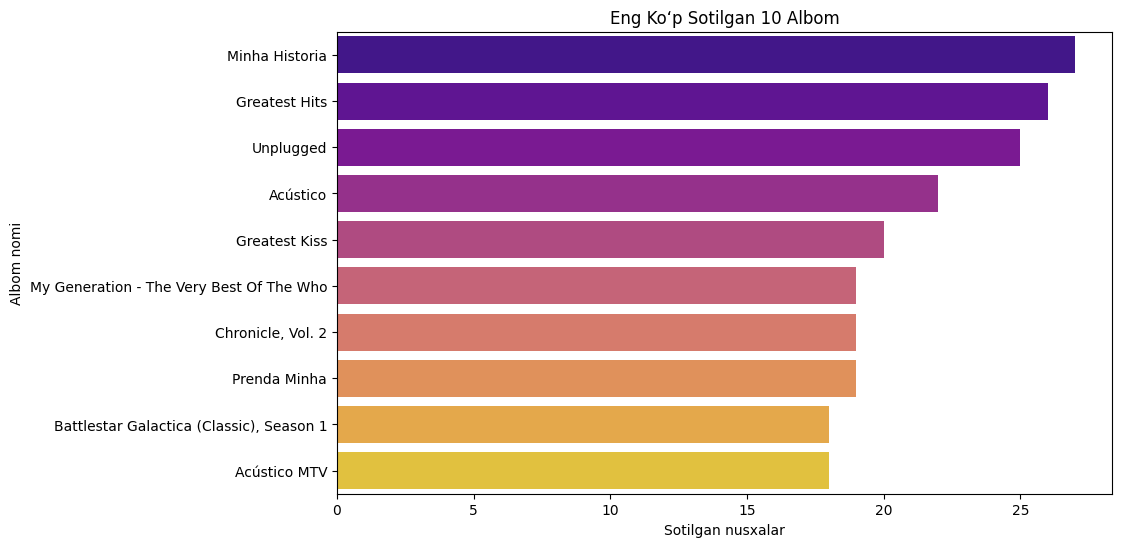

In [15]:
query = """
WITH AlbumSales AS (
    SELECT a.Title AS Album,
           SUM(il.Quantity) AS TotalSold
    FROM InvoiceLine il
    JOIN Track t ON il.TrackId = t.TrackId
    JOIN Album a ON t.AlbumId = a.AlbumId
    GROUP BY a.AlbumId
    ORDER BY TotalSold DESC
    LIMIT 10
)
SELECT * FROM AlbumSales;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
sns.barplot(x="TotalSold", y="Album", data=df, palette="plasma")
plt.title("Eng Ko‘p Sotilgan 10 Albom")
plt.xlabel("Sotilgan nusxalar")
plt.ylabel("Albom nomi")
plt.show()


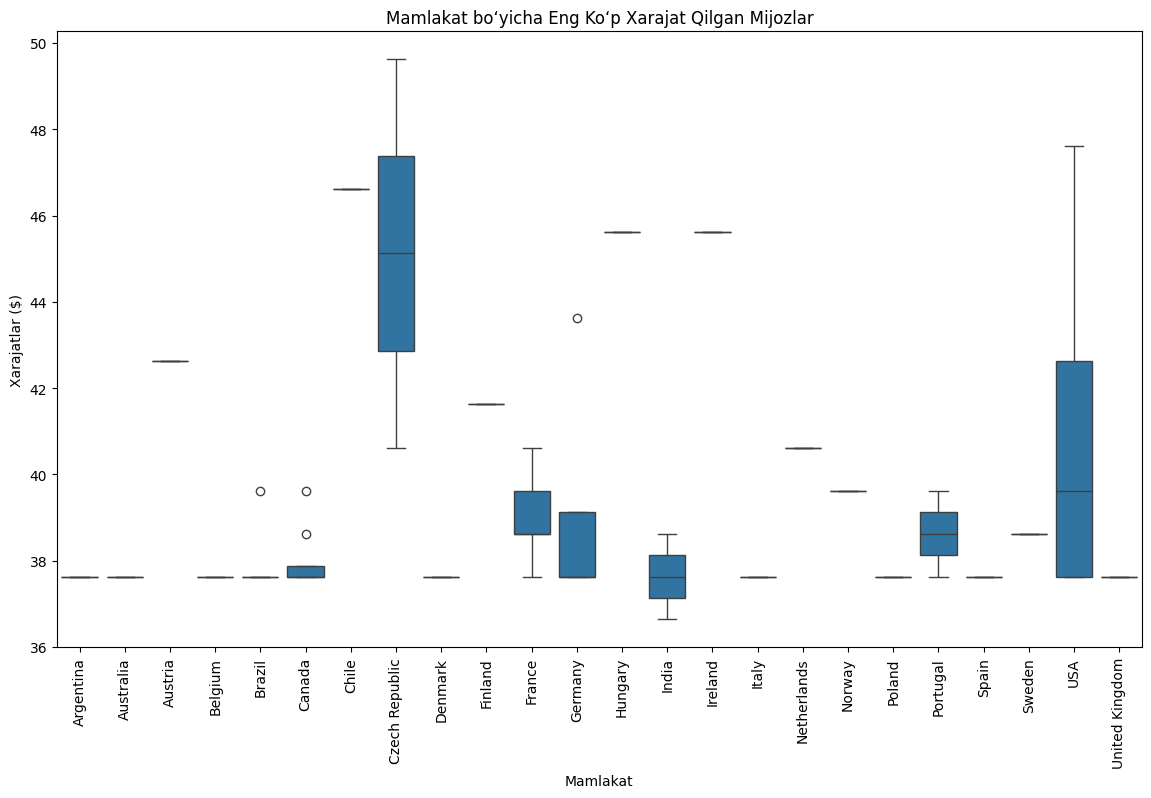

In [17]:
query = """
SELECT c.Country,
       c.FirstName || ' ' || c.LastName AS Customer,
       SUM(i.Total) AS TotalSpent
FROM Customer c
JOIN Invoice i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId
ORDER BY c.Country, TotalSpent DESC;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(14, 8))
sns.boxplot(x="Country", y="TotalSpent", data=df)
plt.xticks(rotation=90)
plt.title("Mamlakat bo‘yicha Eng Ko‘p Xarajat Qilgan Mijozlar")
plt.xlabel("Mamlakat")
plt.ylabel("Xarajatlar ($)")
plt.show()
